<a href="https://colab.research.google.com/github/SaranTrKS/MachineLearningProjects_CloudXLab/blob/main/Classification_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of MNIST handwritten data

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1, cache = True)
X, y =mnist['data'], mnist['target']

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field.  

With some classification methods (particularly template-based methods, such as SVM and K-nearest neighbors), the error rate improves when the digits are centered by bounding box rather than center of mass. If you do this kind of pre-processing, you should report it in your publications. The MNIST database was constructed from NIST's NIST originally designated SD-3 as their training set and SD-1 as their test set. However, SD-3 is much cleaner and easier to recognize than SD-1. The reason for this can be found on the fact that SD-3 was collected among Census Bureau employees, while SD-1 was collected among high-school students. Drawing sensible conclusions from learning experiments requires that the result be independent of the choice of training set and test among the complete set of samples. Therefore it was necessary to build a new database by mixing NIST's datasets.  

The MNIST training set is composed of 30,000 patterns from SD-3 and 30,000 patterns from SD-1. Our test set was composed of 5,000 patterns from SD-3 and 5,000 patterns from SD-1. The 60,000 pattern training set contained examples from approximately 250 writers. We made sure that the sets of writers of the training set and test set were disjoint. SD-1 contains 58,527 digit images written by 500 different writers. In contrast to SD-3, where blocks of data from each writer appeared in sequence, the data in SD-1 is scrambled. Writer identities for SD-1 is available and we used this information to unscramble the writers. We then split SD-1 in two: characters written by the first 250 writers went into our new training set. The remaining 250 writers were placed in our test set. Thus we had two sets with nearly 30,000 examples each. The new training set was completed with enough examples from SD-3, starting at pattern # 0, to make a full set of 60,000 training patterns. Similarly, the new test set was completed with SD-3 examples starting at pattern # 35,000 to make a full set with 60,000 test patterns. Only a subset of 10,000 test images (5,000 from SD-1 and 5,000 from SD-3) is available on this site. The full 60,000 sample training set is available.

Downloaded from openml.org.

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
mnist['target']

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [ ]:
mnist['data'][36000]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
print(set(list(mnist['target'])))

{'1', '2', '0', '9', '8', '6', '4', '7', '5', '3'}


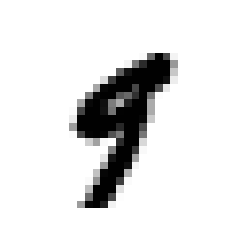

In [ ]:
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = 'nearest')
plt.axis('off')
plt.show()

#

# Dividing the dataset in training and test datast

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
import numpy as np
np.random.seed(42)
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# TrainClassifier Using training 

In [ ]:
#we are going to use Stochastic Gradient Descent(SGD) classifier

from sklearn.linear_model import SGDClassifier
X1 = {"xcoor": pd.Series([0,1]), "ycoord": pd.Series([0,1])}
X3 = pd.DataFrame(X1)
y = [0,1]
clf = SGDClassifier(loss = 'hinge', penalty = "l2")
clf.fit(X3, y)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y_train_9  = (y_train == '9') 
y_test_9 = (y_test == '9')

In [ ]:
type(y_train_9)
np.unique(y_train_9)

array([False,  True])

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42, max_iter = 10)
sgd_clf.fit(X_train, y_train_9)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=10,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [ ]:
#testing SGD Classifier in Sklearn

some_digit = X[36000]
sgd_clf.predict([some_digit])

array([False])

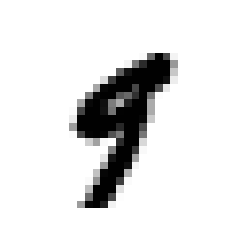

In [ ]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = 'nearest')
plt.axis('off')
plt.show()

# Performance Metrics

- Cross Validation - Accuracy
- Confusion Matrix
    - Precision
    - Recall
    - F1 score
- ROC Curve

## Cross Validation - Accuracy

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_9, cv = 3, scoring = 'accuracy')


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.9401 , 0.95175, 0.9485 ])

- The resulting accuracy of 95% is good enough?

    ● Accuracy may not be a good performance measure when dealing with   skewed datasets
    
    ● Ours is a skewed dataset with only 10% of the data as
    digit 5.

Is the accuracy of 95% for SGD Classifier good enough?
Probably Not!
Never5Classifier - a dumb classifier gave an accuracy of 90%
We need a better measure of performance for the classifier

## Confusion Matrix

- What is confusion matrix?
    - The general idea is to count the number of times instances of class  A are classified as class B. 
    - Can be better than simple accuracy

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_9, cv = 3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_9, y_train_pred)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([[52072,  1979],
       [ 1214,  4735]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_9, y_train_pred),
recall_score(y_train_9, y_train_pred))

0.7052427762883527 0.7959320894267944


In [ ]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-108872.68104161])

In [ ]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

By selecting an appropriate threshold, the user can obtain the
desired precision. However, the best precision may not have the best
recall.

How to decide the best threshold?

    ● Get the scores of all the training dataset using cross_val_predict with
decision_function as function

    ● Compute the precision and recall for all possible thresholds using
precision_recall_curve()

    ● Plot both precision and recall for the thresholds using matplotlib
    
    ● Select the threshold value that gives the best precision/ recall tradeoff to the task at hand.

In [ ]:
#Calculating precision/ recall curve using Scikit-Learn

y_scores = cross_val_predict(sgd_clf, X_train, y_train_9, cv=3, 
                             method="decision_function")


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_9, y_scores)

print(len(precisions), len(recalls), len(y_scores))

58235 58235 60000


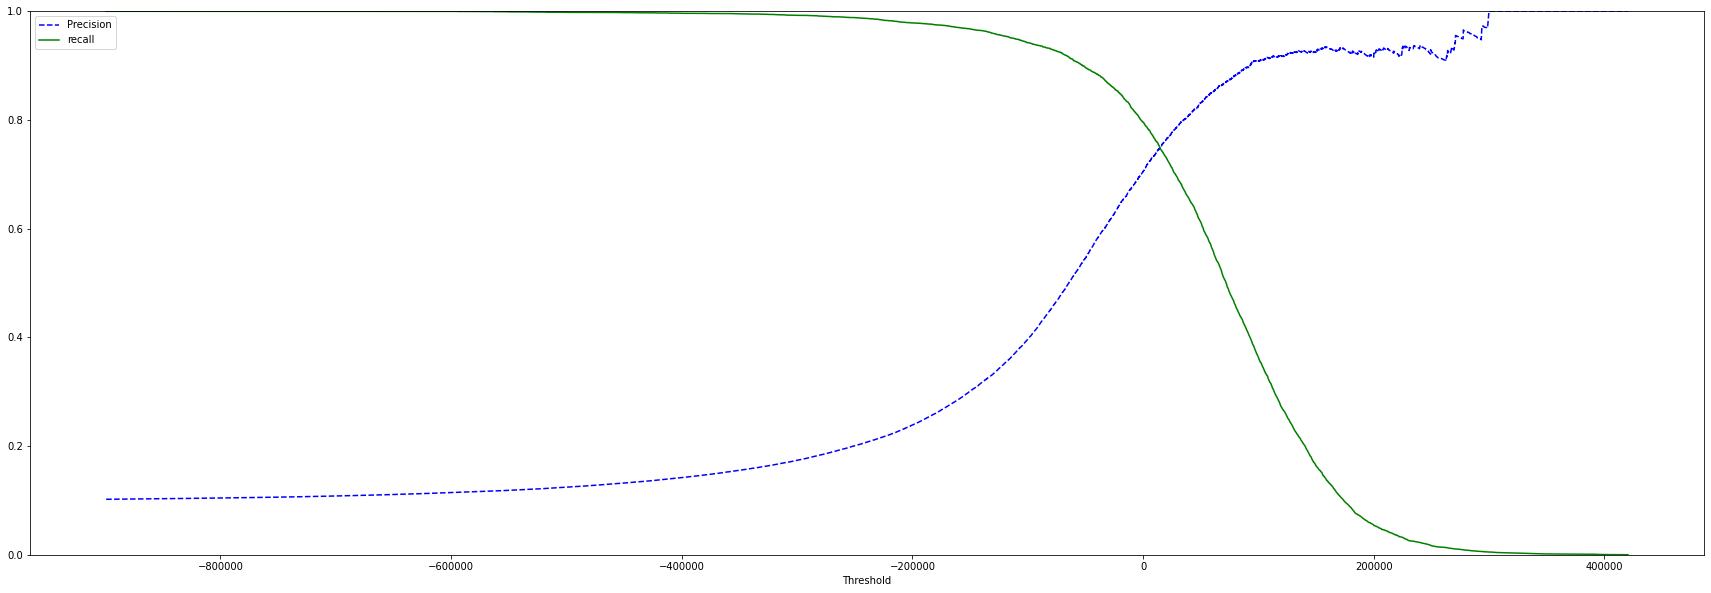

In [ ]:
def plot_precision_recall_vs_threshold(precision, recalls, thresholds):
    plt.figure(figsize = (30,10))
    plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label = "recall")
    plt.xlabel("Threshold")
    plt.legend(loc = "upper left")
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

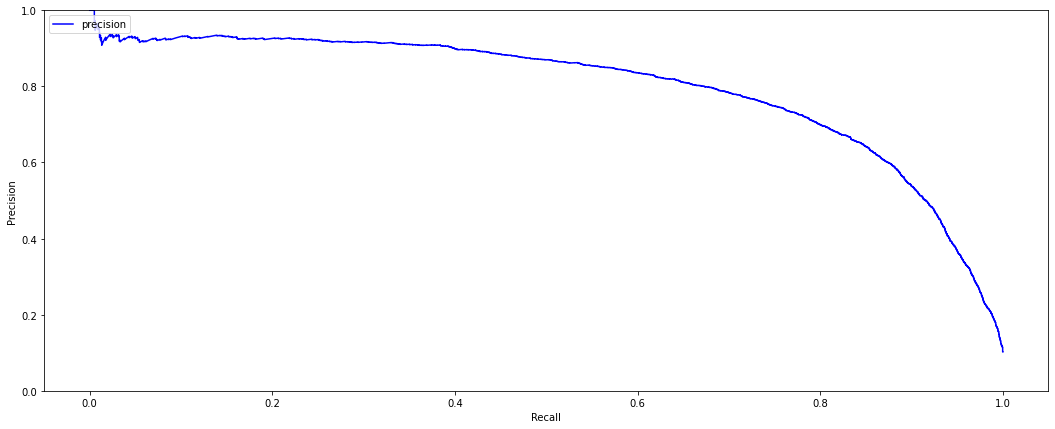

In [ ]:
def plot_precision_vs_recall(precisions, recalls):
    plt.figure(figsize = (18,7))
    plt.plot(recalls[:-1], precisions[:-1], 'b-', label = "precision")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc = "upper left")
    plt.ylim([0,1])
    
plot_precision_vs_recall(precisions, recalls)
plt.show()

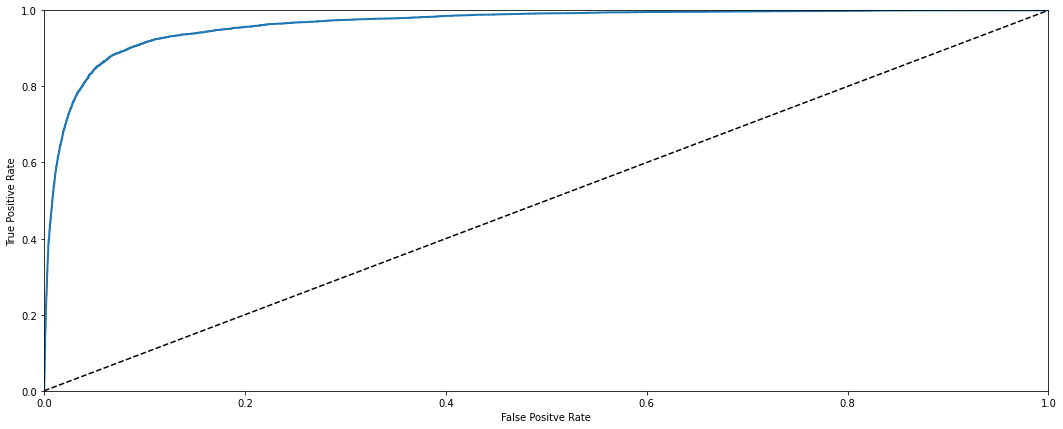

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_9, y_scores)

def plot_roc_curve(frp, tpr, label = None):
    plt.figure(figsize = (18,7))
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positve Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()

Text(0.5, 1.0, 'ROC curves')

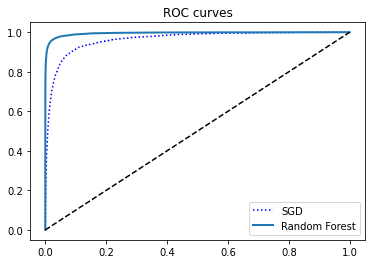

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state = 42)

y_probas_forest = cross_val_predict(forest_clf, X_train,
y_train_9, cv=3, method="predict_proba")

y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_9,y_scores_forest)

fig, ax = plt.subplots()
ax.plot(fpr, tpr, "b:", label = "SGD")
ax.plot(fpr_forest, tpr_forest, linewidth = 2, label="Random Forest")
ax.plot([0,1], [0, 1], 'k--')
ax.legend(loc = 4)
ax.set_title('ROC curves')


# Multi-Class Classification

- Binary classifiers distinguish between two classes
- While multi-class classifiers (also called multinomial classifiers)
  can distinguish
     - Between more than two classes
     - Can distinguish between multiple classes
     - Eg. Random Forest classifiers , naive Bayes classifiers etc

**A Binary Classifier can be used for Multiclass Classification. There
are basically two strategies for doing this.**

1) One-versus-all (OvA) strategy also called one-versus-the-rest 
 - for example,

    a) For eg. to classify the digit images into 10 classes (from 0 to 9)  one way is to train 10 binary classifiers, one for each digit (a 0-detector, a 1-detector, a 2-detector, and so on).

    b) Then when you want to classify an image, select the class
    whose classifier outputs the highest score.

In [ ]:
#By default scikit learn SGDClassifier assumes OvA 
sgd_clf.fit(X_train, y_train)
#Under the hood it trained 10 classifiers 

sgd_clf.predict([some_digit])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array(['9'], dtype='<U1')

- Doing multi-class classification using OvA Classifier

    - 10 classifier scores is obtained
    - Index of the maximum score is 9

In [ ]:
some_digit_scores = sgd_clf.decision_function([some_digit])

some_digit_scores

array([[-356891.78296008, -205893.89064262, -392724.74455931,
         -42407.22865367,  -60859.41731767, -172084.00002865,
        -360034.34598114,  -66102.34553565, -224000.91430693,
          17111.65626963]])

the scores of 10 classifiers is obtained , and 17111.656 is the highest score 

**2. One-versus-one (OvO) strategy** 


  a. This is another strategy in which we train a binary classifier
for every pair of digits: one to distinguish 0s and 1s, another
to distinguish 0s and 2s, another for 1s and 2s, and so on.

b. If there are N classes, you need to train N × (N – 1) / 2
classifiers.

**Doing multi-class classification using OvO Classifier**

* SGD uses OVA by default
* Need to specifically mention OvO to do OvO classification
* Number of estimators trained for MNIST dataset = 45

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state =42, max_iter = 20))

ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

array(['4'], dtype=object)

In [ ]:
len(ovo_clf.estimators_)

45

**Error Analysis**
* Once the model (classifier) is identified, it can be improved by analyzing the types of errors it makes
* For the previous multiclass classification example of classifying images of digits into digit labels, it can be done by observing the confusion matrix and plotting it on the graph

In [ ]:
#calculating confusion matrix for multicalss using Scikit-Learn

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv = 3)
conf_mx = confusion_matrix(y_train, y_train_pred)

conf_mx

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([[5765,    2,   16,   16,    7,   21,   33,    9,   48,    6],
       [   1, 6470,   41,   17,    9,   35,   13,   16,  138,    2],
       [  79,   52, 5155,  153,   39,   31,  171,   85,  181,   12],
       [  80,   40,  224, 5087,   19,  286,   62,   78,  217,   38],
       [  37,   30,   46,   15, 5101,   22,   64,   75,  315,  137],
       [ 127,   27,   35,  208,   48, 4451,  175,   35,  259,   56],
       [  45,   10,   57,    3,   19,  112, 5611,   11,   45,    5],
       [  25,   32,   91,   49,   50,   15,    8, 5824,   81,   90],
       [  70,  175,  127,  278,   43,  394,   86,   51, 4571,   56],
       [  48,   33,   54,  117,  326,   99,    5,  801,  834, 3632]])

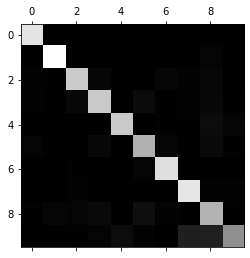

In [ ]:
#plotting confusion matrix for multiclass using sklearn

plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show()

**Observations**:
* Looks fairly good since most images are on the diagonal
* 5s look darker than other digits 
    * it could be because , Fewer 5s in the dataset
    * Classifier does not perform well on 5s



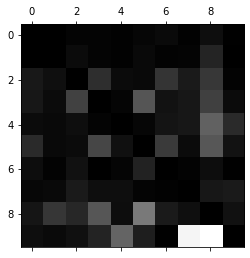

In [ ]:
#Highlight the errors by normalizing
row_sums = conf_mx.sum(axis = 1, keepdims = True)
norm_conf_mx = conf_mx / row_sums

#Remove the correct predictions

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

**Observations**:
  * 8 and 9 columns are bright: many digits misclassified as 8 and 9
  * 8 and 9 rows are bright: many 8 and 9 misclassified as other digits.
  * (3,5) and (5,3) are little brighter :
  confusion between 3 and 5
  * 4 and 5 are confused with 8 

**possible solutions**
  * gather more training data for 8s and 9s
  * Engineer new features that would help the classifier , like number of loops , curves , and bends
  * preprocess images
      * using skelarn, Pillow or OpenCV to make certain features stand out more

  * we need to analyse individual errors

# Multilabel classification

**Classification of image into whether [large, odd], how do we do it ?** 

In [ ]:

y_train = y_train.astype(int)

y_train_large = (y_train >=7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]


In [ ]:
#Train the classifier

#KNeighbours Classifier supports multi-label classification

from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn_clf.predict([some_digit])

array([[ True,  True]])

# Multi-Output Classification 

* It is simply a generalization of multilabel classification where
each label can be multiclass (i.e., it can have more than two
possible values).

* Multi-output classification example:
  * Removing noise from images

* We'll build a system that removes noise from images. It will take
as input a noisy digit image, and it will output a clean digit image,
represented as an array of pixel intensities, just like the MNIST
images.


● Notice that the classifier’s output is

 - **Multilabel (one label per pixel) - so 784 labels**

 -  **Multiclass:** And each label can have **multiple values** (pixel
intensity ranges from 0 to 255) - 256 classes.

It is thus an example of a **Multioutput classification system.**

In [ ]:
#Demonstrating multi-output classifier: digit image noise removal

#Adding noise to the training set

import numpy.random as rnd
noise_train = rnd.randint(0,100, (len(X_train), 784))
X_train_mod = X_train + noise_train

#adding noise to the test set

noise_test = rnd.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise_test



In [ ]:
#setting clean image as the label (y_train and y_test)

y_train_mod = X_train
y_test_mod = X_test


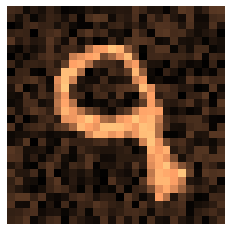

In [ ]:
#let us view the noisy image 

def plot_digit(array):
  array_image = array.reshape(28,28)
  plt.imshow(array_image, cmap = matplotlib.cm.copper, interpolation = "nearest")
  plt.axis('off')
  plt.show()

plot_digit(X_test_mod[4000])

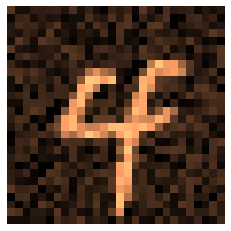

In [ ]:
plot_digit(X_test_mod[4001])

In [ ]:
#let us clean the image using the Classifier

knn_clf.fit(X_train_mod, y_train_mod)


IndexError: ignored

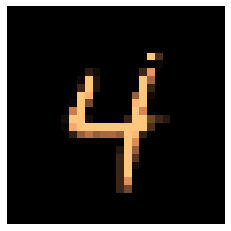

In [ ]:
clean_digit = knn_clf.predict([X_test_mod[4001]])
plot_digit(clean_digit)


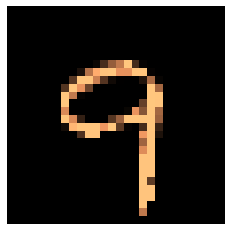

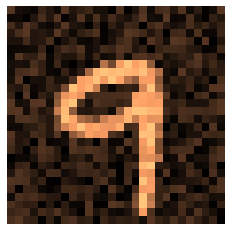

In [ ]:
clean_digit1 = knn_clf.predict([X_test_mod[3999]])
plot_digit(clean_digit1)
plot_digit(X_test_mod[3999])